### DAV 6150 Module 4 Assignment

##### Feature Selection & Dimensionality Reduction

For this assignment we will apply feature selection
and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear
regression model that predicts the number of times an online news article will be shared

The dataset provided for this assignment originates from the UC Irvine Machine Learning Repository and pertains to online 
news popularity. It consists of 39,797 observations and 61 attributes, with the "shares" variable serving as the response variable
for a regression model.

For the introduction of the assignment, we first familiarized ourselves with the dataset's structure and objective. 
Our primary goal was to build a linear regression model to predict the number of shares an online news article would
receive based on various explanatory variables.



<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
 
</head>
<body>
    <h2>Steps in Analysis and feature selection</h2>
    <ol>
        <li><strong>Data Collection:</strong> Collect the dataset containing various features related to online news articles.</li>
        <li><strong>Exploratory Data Analysis (EDA):</strong> Perform exploratory visualizations and statistical analysis to understand the dataset's nature, identify patterns, and uncover potential relationships between variables.</li>
        <li><strong>Feature Selection:</strong> Apply various methods for feature selection, such as Lasso regression, PCA, Recursive Feature Elimination (RFE), and Gradient Boosting Regressor, to select the most relevant features for predicting the number of shares.</li>
        <li><strong>Model Fitting and Evaluation:</strong> Train and evaluate a linear regression model using cross-validation to assess its predictive performance.</li>
        <li><strong>Conclusion:</strong> Summarize the findings and suggest further steps, such as exploring alternative modeling techniques for better predictive accuracy.</li>
    </ol>
</body>
</html>


In [50]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix

In [51]:
# styling matplotlib graphs
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [52]:
#loading the data from my own github repo
# Loading Data from Github

# Loading Data from Github

url0 = "https://github.com/vidhika-git/DAV-6150/blob/main/EDA/M4_Data.csv?raw=true"


# Reading Data via pd.read_csv
df = pd.read_csv(url0)
pd.set_option('display.max_columns', None)
# Displaying first 10 rows of the data
df.head(5)

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

In [53]:
df.shape

(39644, 61)

In [54]:
#checking df info, including column data types, and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Exploratory Data Analysis (EDA): We will perform basic exploratory data analysis to understand the nature of each
variable, including the response variable (shares). This will involve calculating summary statistics, 
visualizing distributions, and identifying any preliminary predictive inferences.

In [55]:
df.columns 

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [56]:
#stripping the column to remove extra space in the column names
df.columns = [col.strip() if isinstance(col, str) else col for col in df.columns]    

In [57]:
df.duplicated().sum()   #checking for dupilictes data

0

In [58]:
# drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(labels=['url', 'timedelta'], axis = 1, inplace=True)
df.head(n=4)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                       496.0                1.0                 0.0   
1                         0.0                1.0                 0.0   
2                       918.0                1.0                 0.0   
3                         0.0                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   

   weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01  \
0                  0.0                0.0         0.0  0.500331  0.378279   
1                  0.0                0.0         0.0  0.799756  0.050047   
2                  0.0                0.0         0.0  0.217792  0.033334   
3                  0.0                0.0         0.0  0.028573  0.419300   

     LDA_02    LDA_03    LDA_04  global_subjectivity  \
0  0.040005  0.041263  0.040123             0.521617   
1  0.050096  0.050101  0.050001             0.341246   
2  0.033351  0.033334  0.682188             0.702222   
3  0.494651  0.028905  0.028572             0.429850   

   glob

In [59]:
#we can drop is weekend column also as it information can be dervied in other columns also 
df.drop(labels=['is_weekend'], axis = 1, inplace=True)
df.head(n=4)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365           5.0                        0.0   
1              4.913725           4.0                        0.0   
2              4.393365           6.0                        0.0   
3              4.404896           7.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            1.0                  0.0                     0.0   
1                            0.0                  1.0                     0.0   
2                            0.0                  1.0                     0.0   
3                            1.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    0.0         0.0         0.0   
1                   0.0                    0.0         0.0         0.0   
2                   0.0                    0.0         0.0         0.0   
3                   0.0                    0.0         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                       496.0                1.0                 0.0   
1                         0.0                1.0                 0.0   
2                       918.0                1.0                 0.0   
3                         0.0                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   

   weekday_is_saturday  weekday_is_sunday    LDA_00    LDA_01    LDA_02  \
0                  0.0                0.0  0.500331  0.378279  0.040005   
1                  0.0                0.0  0.799756  0.050047  0.050096   
2                  0.0                0.0  0.217792  0.033334  0.033351   
3                  0.0                0.0  0.028573  0.419300  0.494651   

     LDA_03    LDA_04  global_subjectivity  global_sentiment_polarity  \
0  0.041263  0.040123             0.521617                   0.092562   
1  0.050101  0.050001             0.341246                   0.148948   
2  0.033334  0.682188             0.702222                   0.323333   
3  0.0

The following colums are binary:

data_channel_is_lifestyle  <br>
data_channel_is_entertainment <br>
data_channel_is_bus<br>
data_channel_is_socmed<br>
data_channel_is_tech<br>
data_channel_is_worl<br>
weekday_is_monday<br>
weekday_is_tuesday<br>
weekday_is_wednesday<br>
weekday_is_thursday<br>
weekday_is_friday<br>
weekday_is_saturday<br>
weekday_is_sunday<br>
is_weekend<br>

and The following features are discrete:<br>

n_tokens_title<br>
n_tokens_content<br>
num_hrefs<br>
num_self_hrefs<br>
num_imgs<br>
num_videos<br>
num_keywords  <br>  
so should be in int format<br>


In [60]:
#changing the type of data into boolean
binary = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']
for x in binary:
    df[x] = df[x].astype('bool')

In [61]:
int_ = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for x in int_:
    df[x] = df[x].astype('int64')

In [62]:
#again checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  int64  
 1   n_tokens_content               39644 non-null  int64  
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  int64  
 6   num_self_hrefs                 39644 non-null  int64  
 7   num_imgs                       39644 non-null  int64  
 8   num_videos                     39644 non-null  int64  
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  int64  
 11  data_channel_is_lifestyle      39644 non-null  bool   
 12  data_channel_is_entertainment  39644 non-null 

In [63]:
# Perform exploratory data analysis (EDA)
# Summary statistics
df.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    39644.000000      39644.000000     39644.000000      39644.000000   
mean        10.398749        546.514731         0.548216          0.996469   
std          2.114037        471.107508         3.520708          5.231231   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.470870          1.000000   
50%         10.000000        409.000000         0.539226          1.000000   
75%         12.000000        716.000000         0.608696          1.000000   
max         23.000000       8474.000000       701.000000       1042.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              39644.000000  39644.000000    39644.000000  39644.000000   
mean                   0.689175     10.883690        3.293638      4.544143   
std                    3.264816     11.332017        3.855141      8.309434   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.625739      4.000000        1.000000      1.000000   
50%                    0.690476      8.000000        3.000000      1.000000   
75%                    0.754630     14.000000        4.000000      4.000000   
max                  650.000000    304.000000      116.000000    128.000000   

         num_videos  average_token_length  num_keywords    kw_min_min  \
count  39644.000000          39644.000000  39644.000000  39644.000000   
mean       1.249874              4.548239      7.223767     26.106801   
std        4.107855              0.844406      1.909130     69.633215   
min        0.000000              0.000000      1.000000     -1.000000   
25%        0.000000              4.478404      6.000000     -1.000000   
50%        0.000000              4.664082      7.000000     -1.000000   
75%        1.000000              4.854839      9.000000      4.000000   
max       91.000000              8.041534     10.000000    377.000000   

          kw_max_min    kw_avg_min     kw_min_max     kw_max_max  \
count   39644.000000  39644.000000   39644.000000   39644.000000   
mean     1153.951682    312.366967   13612.354102  752324.066694   
std      3857.990877    620.783887   57986.029357  214502.129573   
min         0.000000     -1.000000       0.000000       0.000000   
25%       445.000000    141.750000       0.000000  843300.000000   
50%       660.000000    235.500000    1400.000000  843300.000000   
75%      1000.000000    357.000000    7900.000000  843300.000000   
max    298400.000000  42827.857143  843300.000000  843300.000000   

          kw_avg_max    kw_min_avg     kw_max_avg    kw_avg_avg  \
count   39644.000000  39644.000000   39644.000000  39644.000000   
mean   259281.938083   1117.146610    5657.211151   3135.858639   
std    135102.247285   1137.456951    6098.871957   1318.150397   
min         0.000000     -1.000000       0.000000      0.000000   
25%    172846.875000      0.000000    3562.101631   2382.448566   
50%    244572.222223   1023.635611    4355.688836   2870.074878   
75%    330980.000000   2056.781032    6019.953968   3600.229564   
max    843300.000000   3613.039819  298400.000000  43567.659946   

       self_reference_min_shares  self_reference_max_shares  \
count               39644.000000               39644.000000   
mean                 3998.755396               10329.212662   
std                 19738.670516               41027.576613   
min                     0.000000                   0.000000   
25%                   639.000000                1100.000000   
50%                  1200.000000                2800.000000   
75%                  2600.000000                8000.000000   
max                843300.000000              843300.000000   

       self_reference_avg_sharess        LDA_00        LDA_01        LDA_02  \
count                39644.000000  39644.000000  39644.000000  39644.0

The mean value of shares (number of shares an article receives) is approximately 3395, with a standard deviation of 
around 11627. This indicates that the number of shares varies widely across articles.

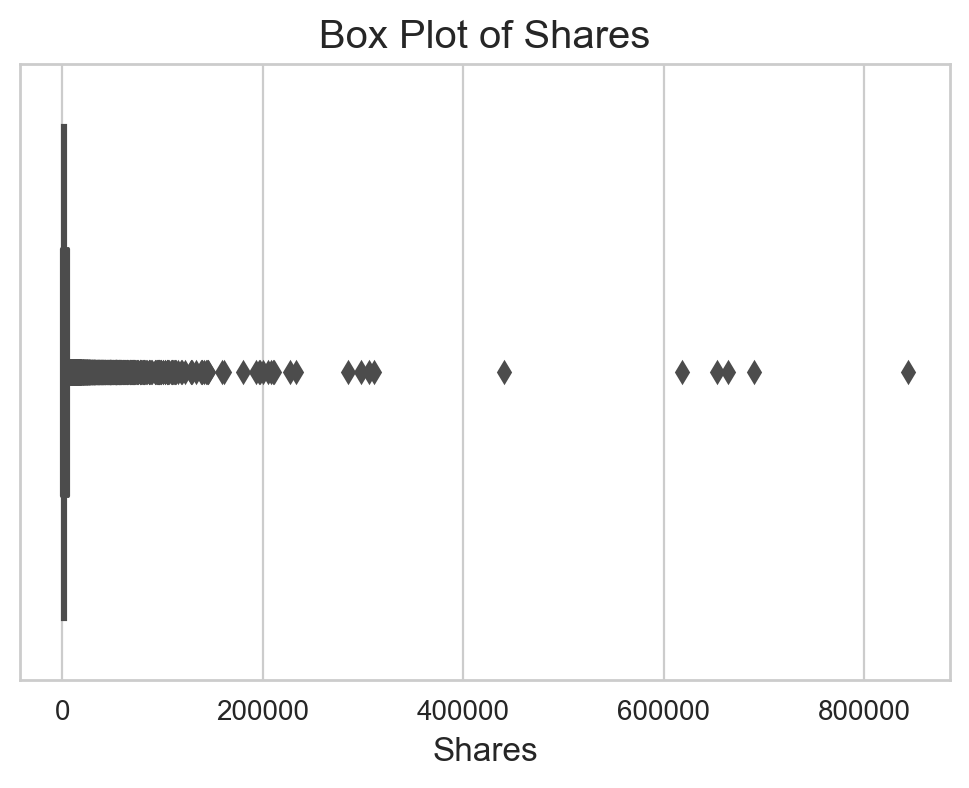

In [64]:
# shares variable, showing the distribution of shares and any outliers present in the data.
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot box plot of shares
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['shares'], color='blue')
plt.title('Box Plot of Shares')
plt.xlabel('Shares')
plt.show()

most of the share value lies between 0-20000, but their are some outliers in data aswell , 
This is acceptable so we will no take any corrections steps

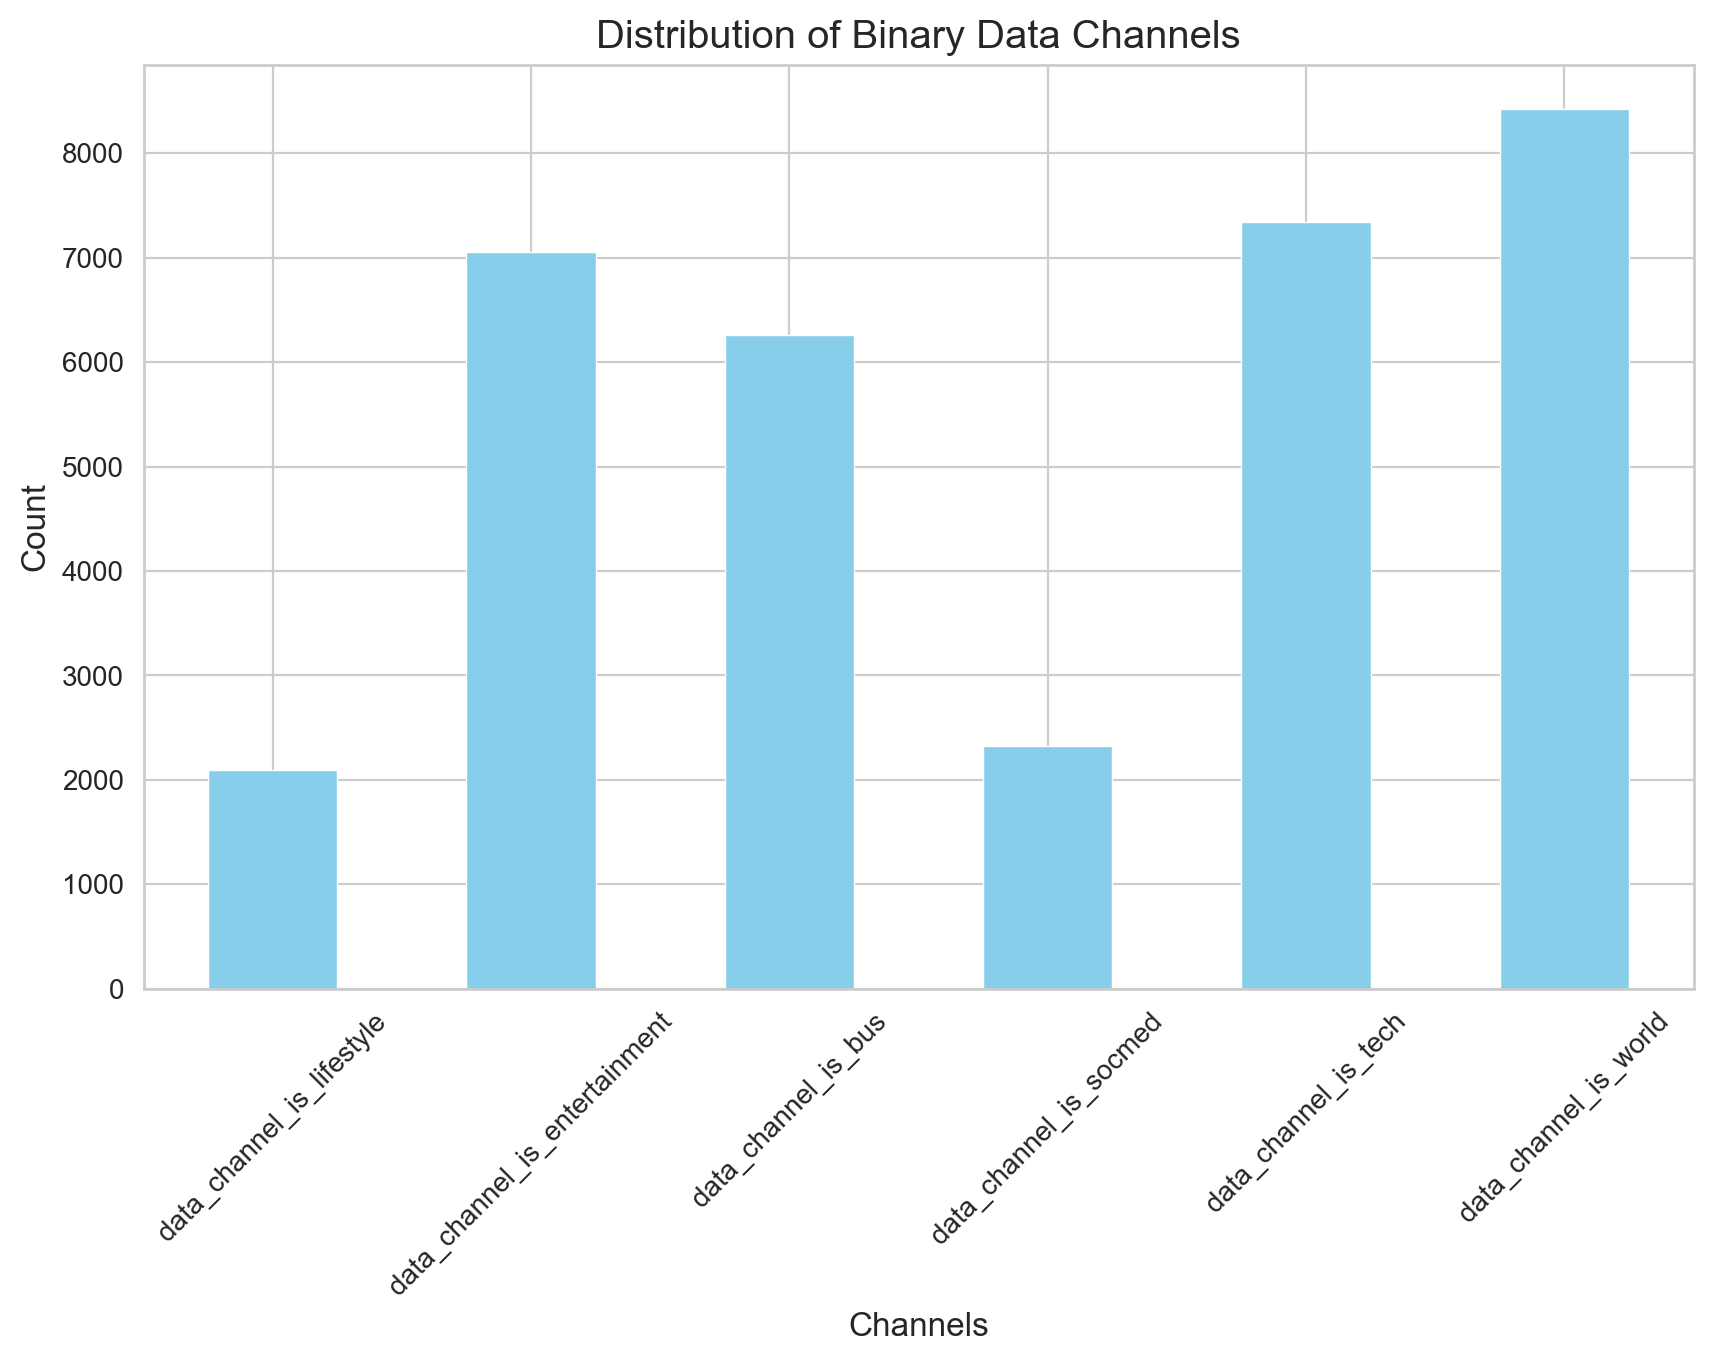

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
binary_columns = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                  'data_channel_is_bus', 'data_channel_is_socmed', 
                  'data_channel_is_tech', 'data_channel_is_world']

# Count the occurrences of each category in binary columns
binary_counts = df[binary_columns].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
binary_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Binary Data Channels')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


this catplot explains distribution of shares channel wise, this give insights that 
tech and world articles are most popular  and socmed  articles  shared least

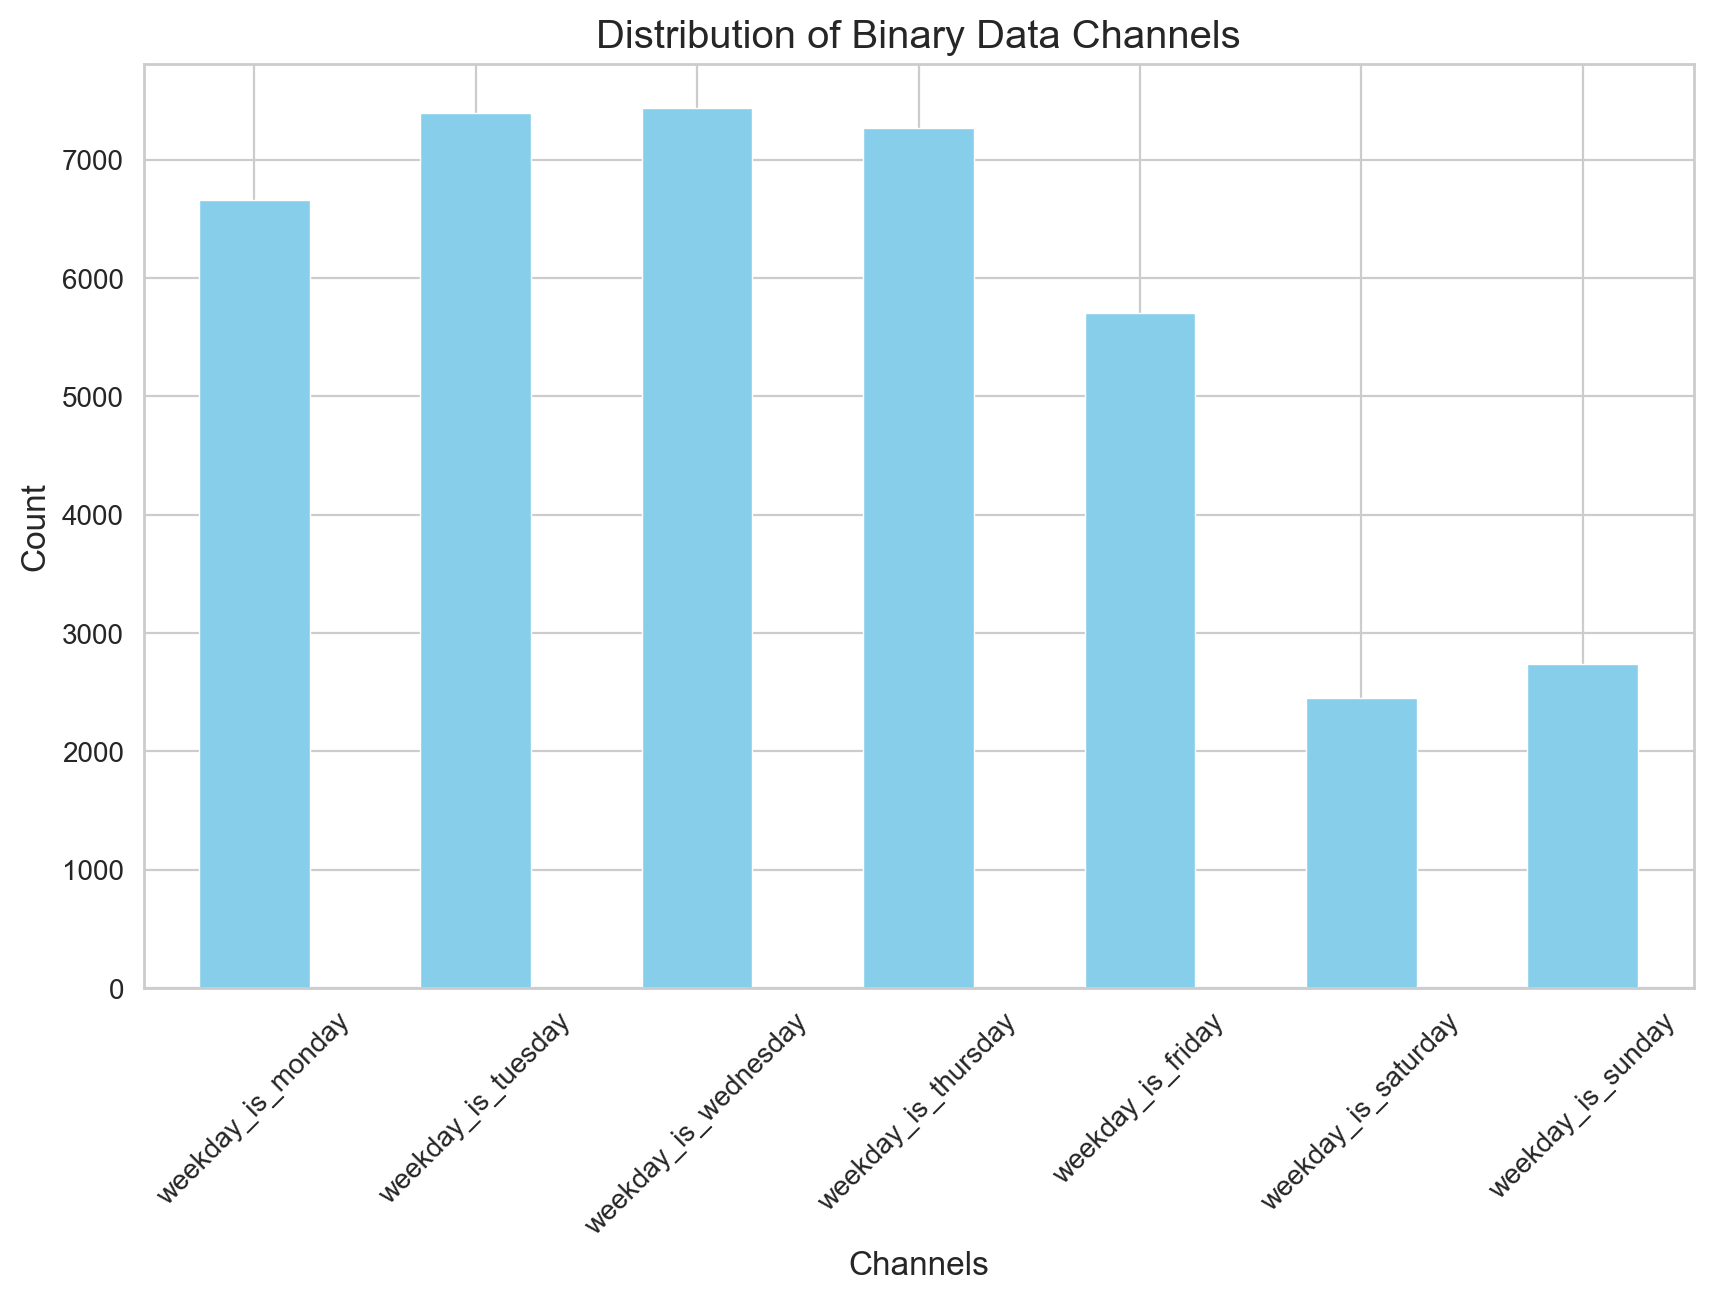

In [66]:
binary_columns=['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']




# Count the occurrences of each category in binary columns
binary_counts = df[binary_columns].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
binary_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Binary Data Channels')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


articles are shared most on tuesdays and wednesdays and least on weekends

<Figure size 800x600 with 0 Axes>

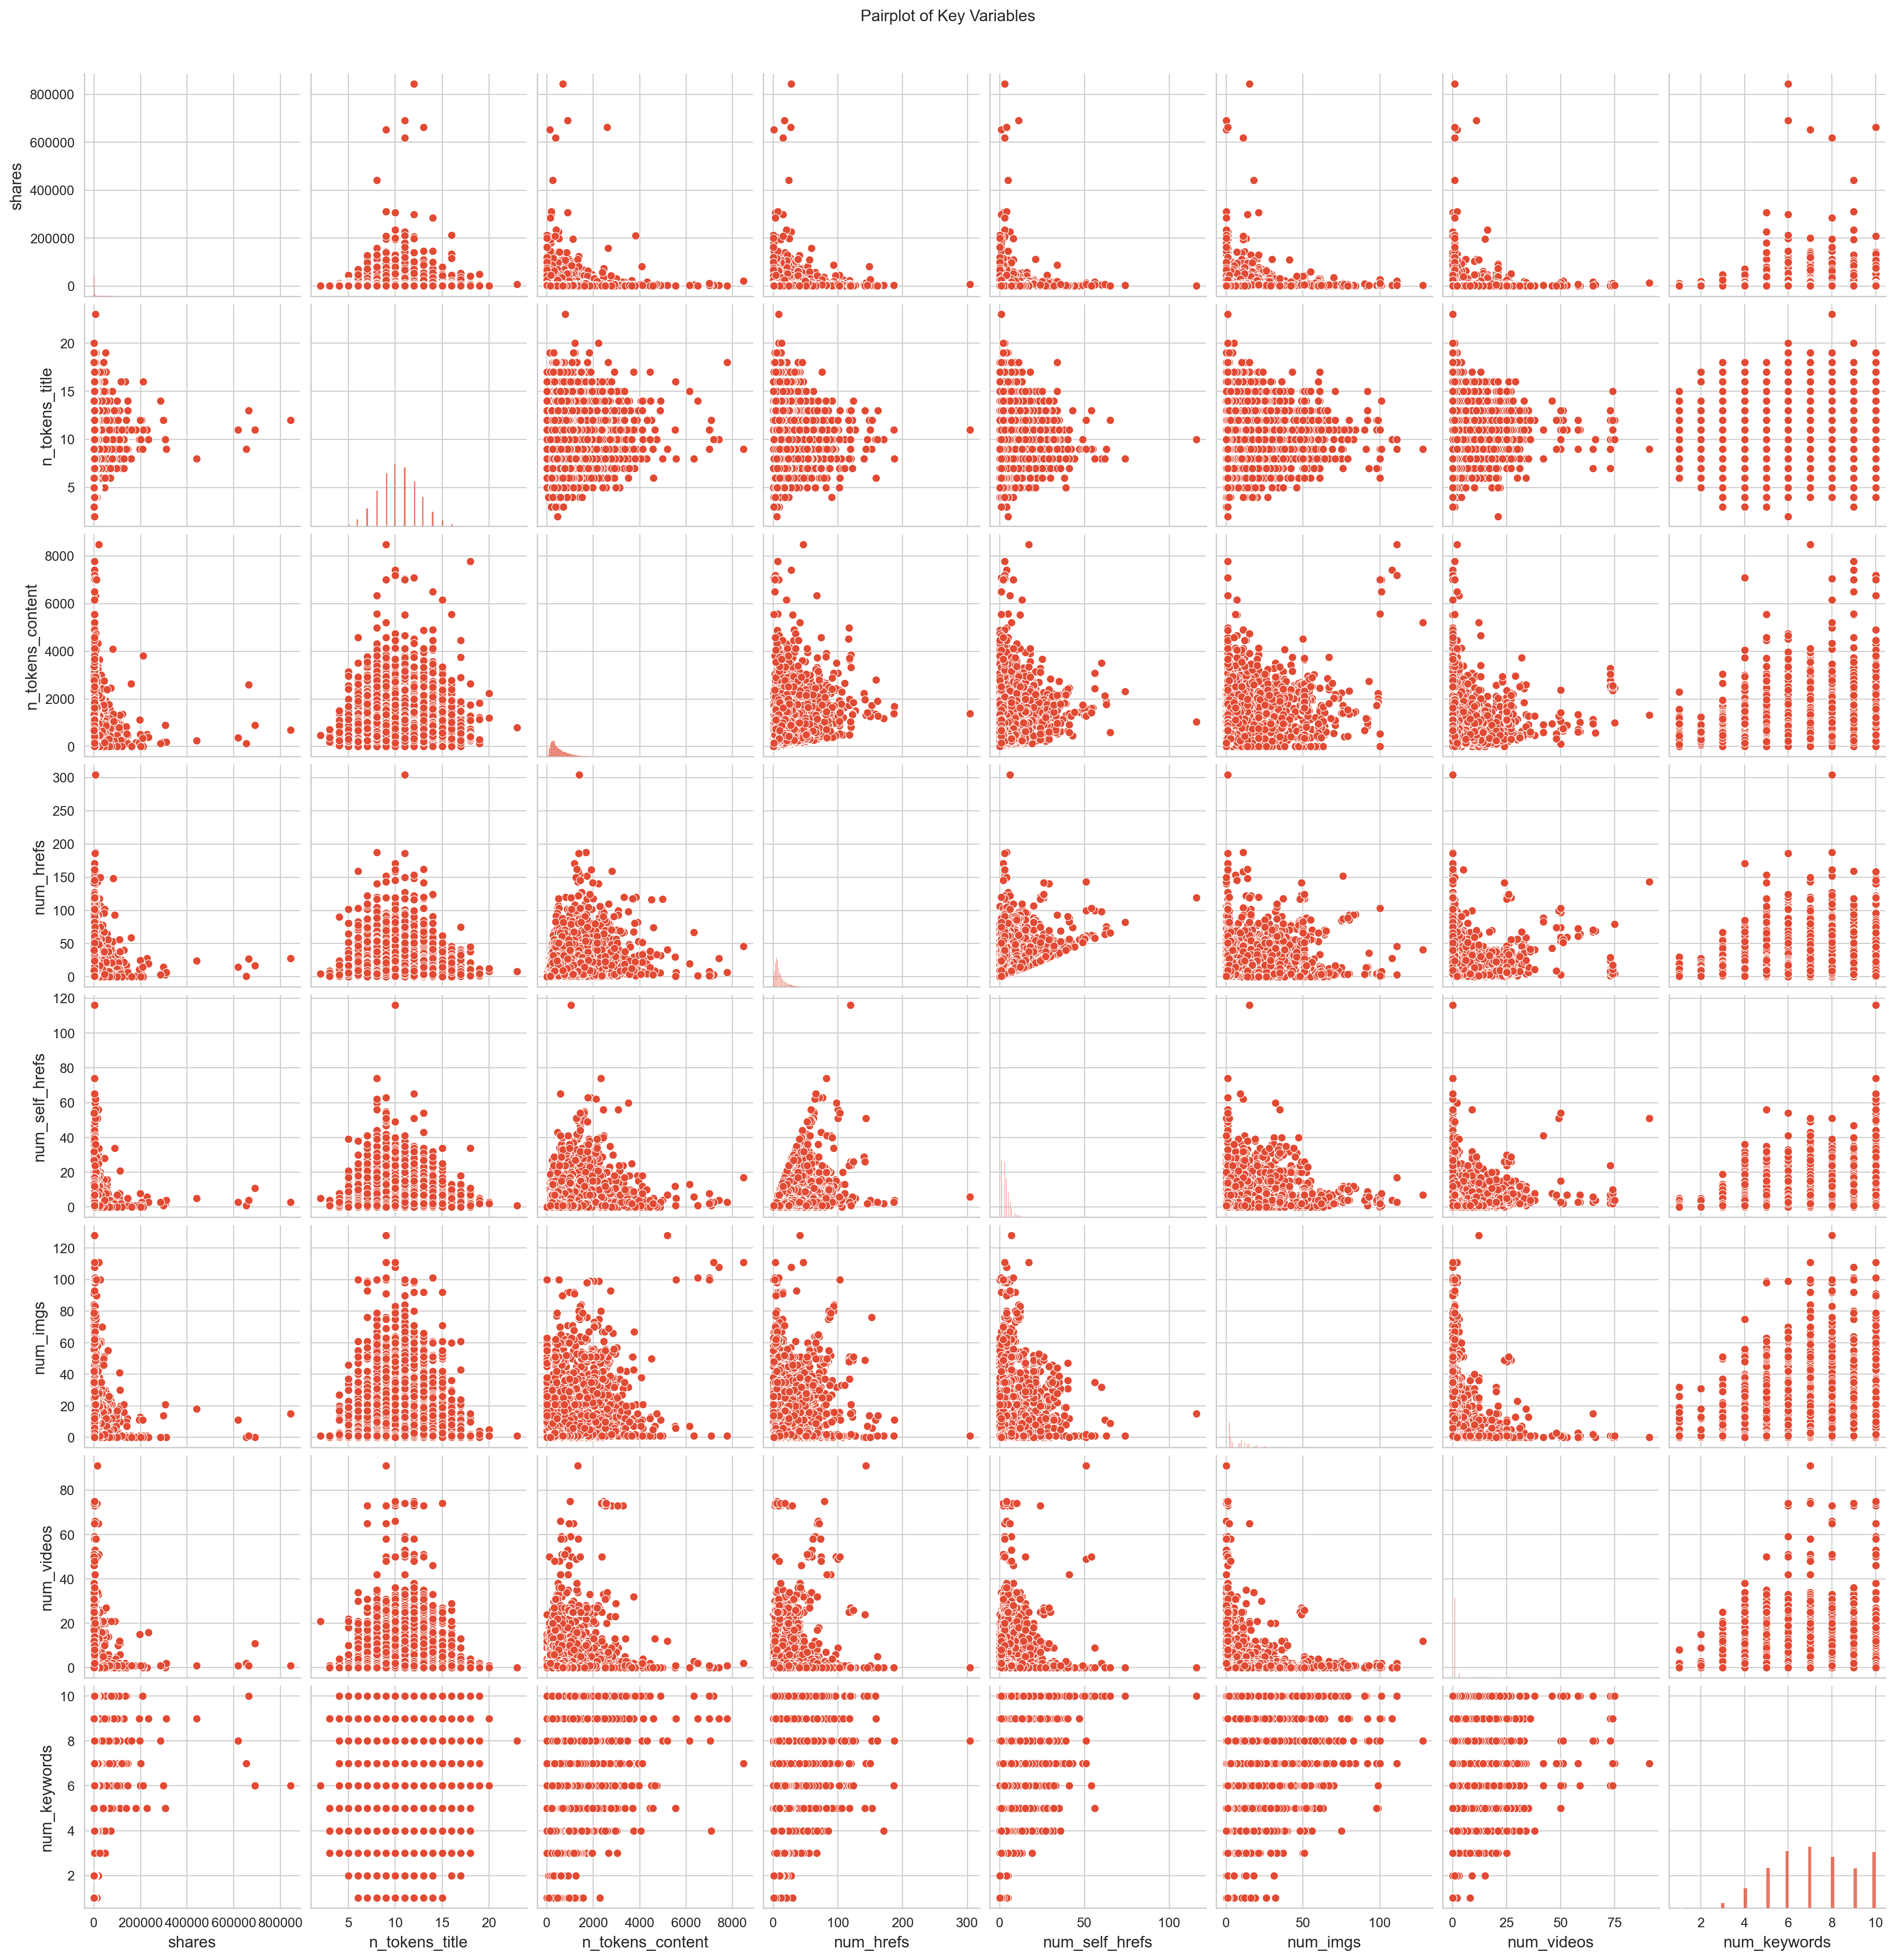

In [67]:


# List of discrete columns
discrete_columns = [   'shares','n_tokens_title', 'n_tokens_content', 'num_hrefs', 
                    'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords']

# Creating pairplot
plt.figure(figsize=(8,6))
sns.pairplot(df[discrete_columns])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


<ul><b><h4>observations </h4></b>
<li>it seems article with 5-10  Number of words in the title are shared more and with comparetevely less  Number of words in the content</li>
<li>less Number of links is associates with higher number of shares </li>
<li>Number of keywords in the metadata tends to show higher share in the range 4-8</li>
</ul>

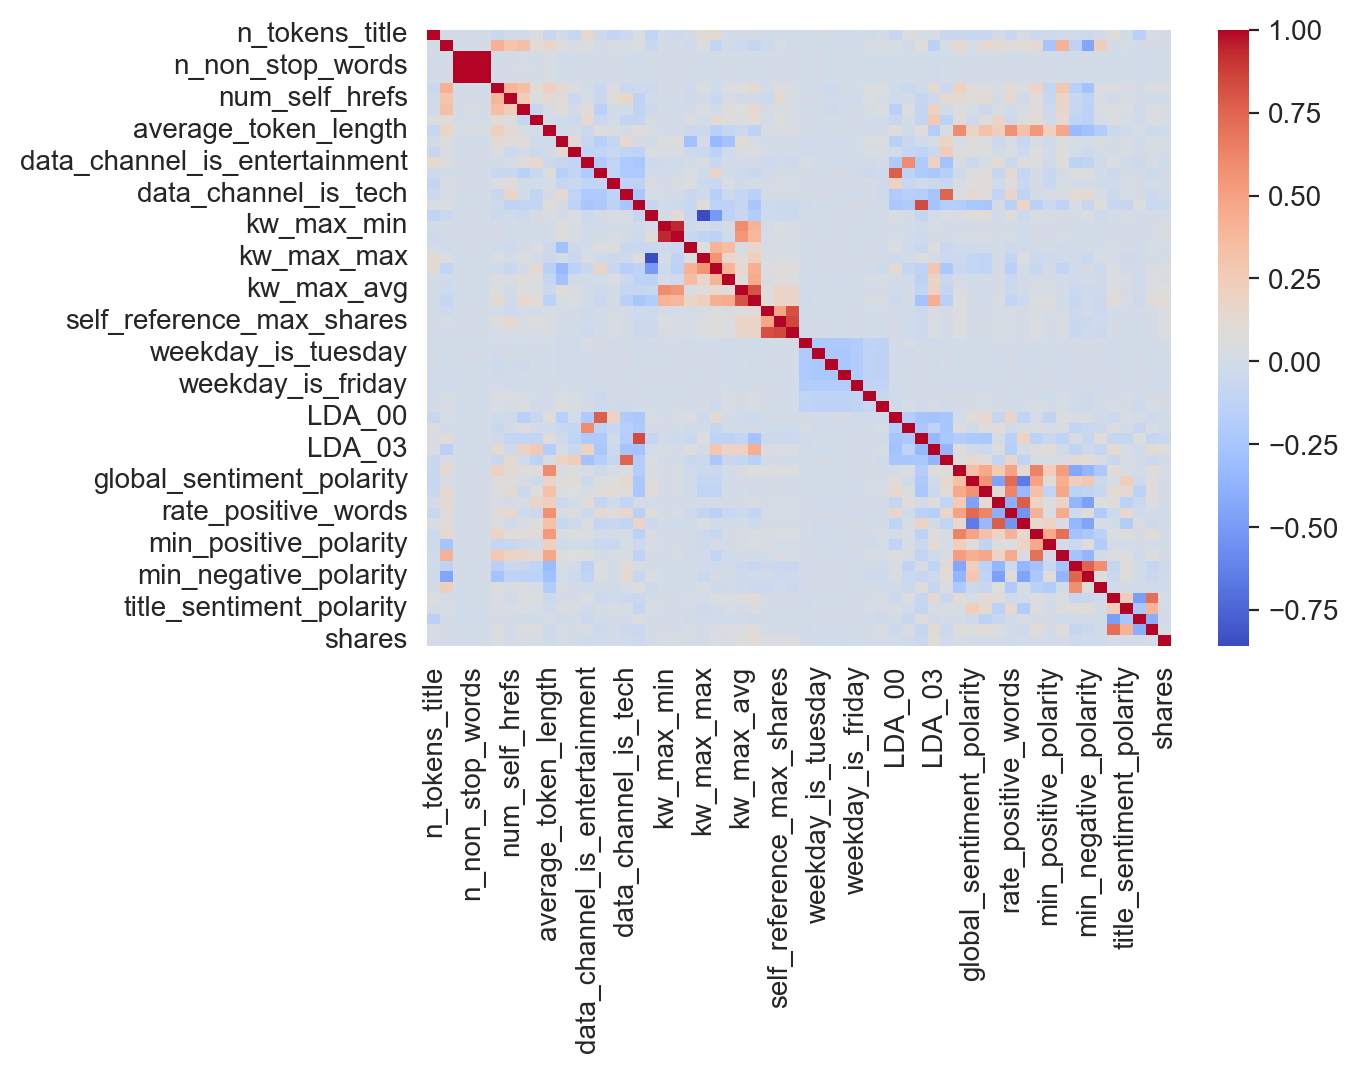

In [68]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

This heatmap shows that their are not much strong relationship between the data

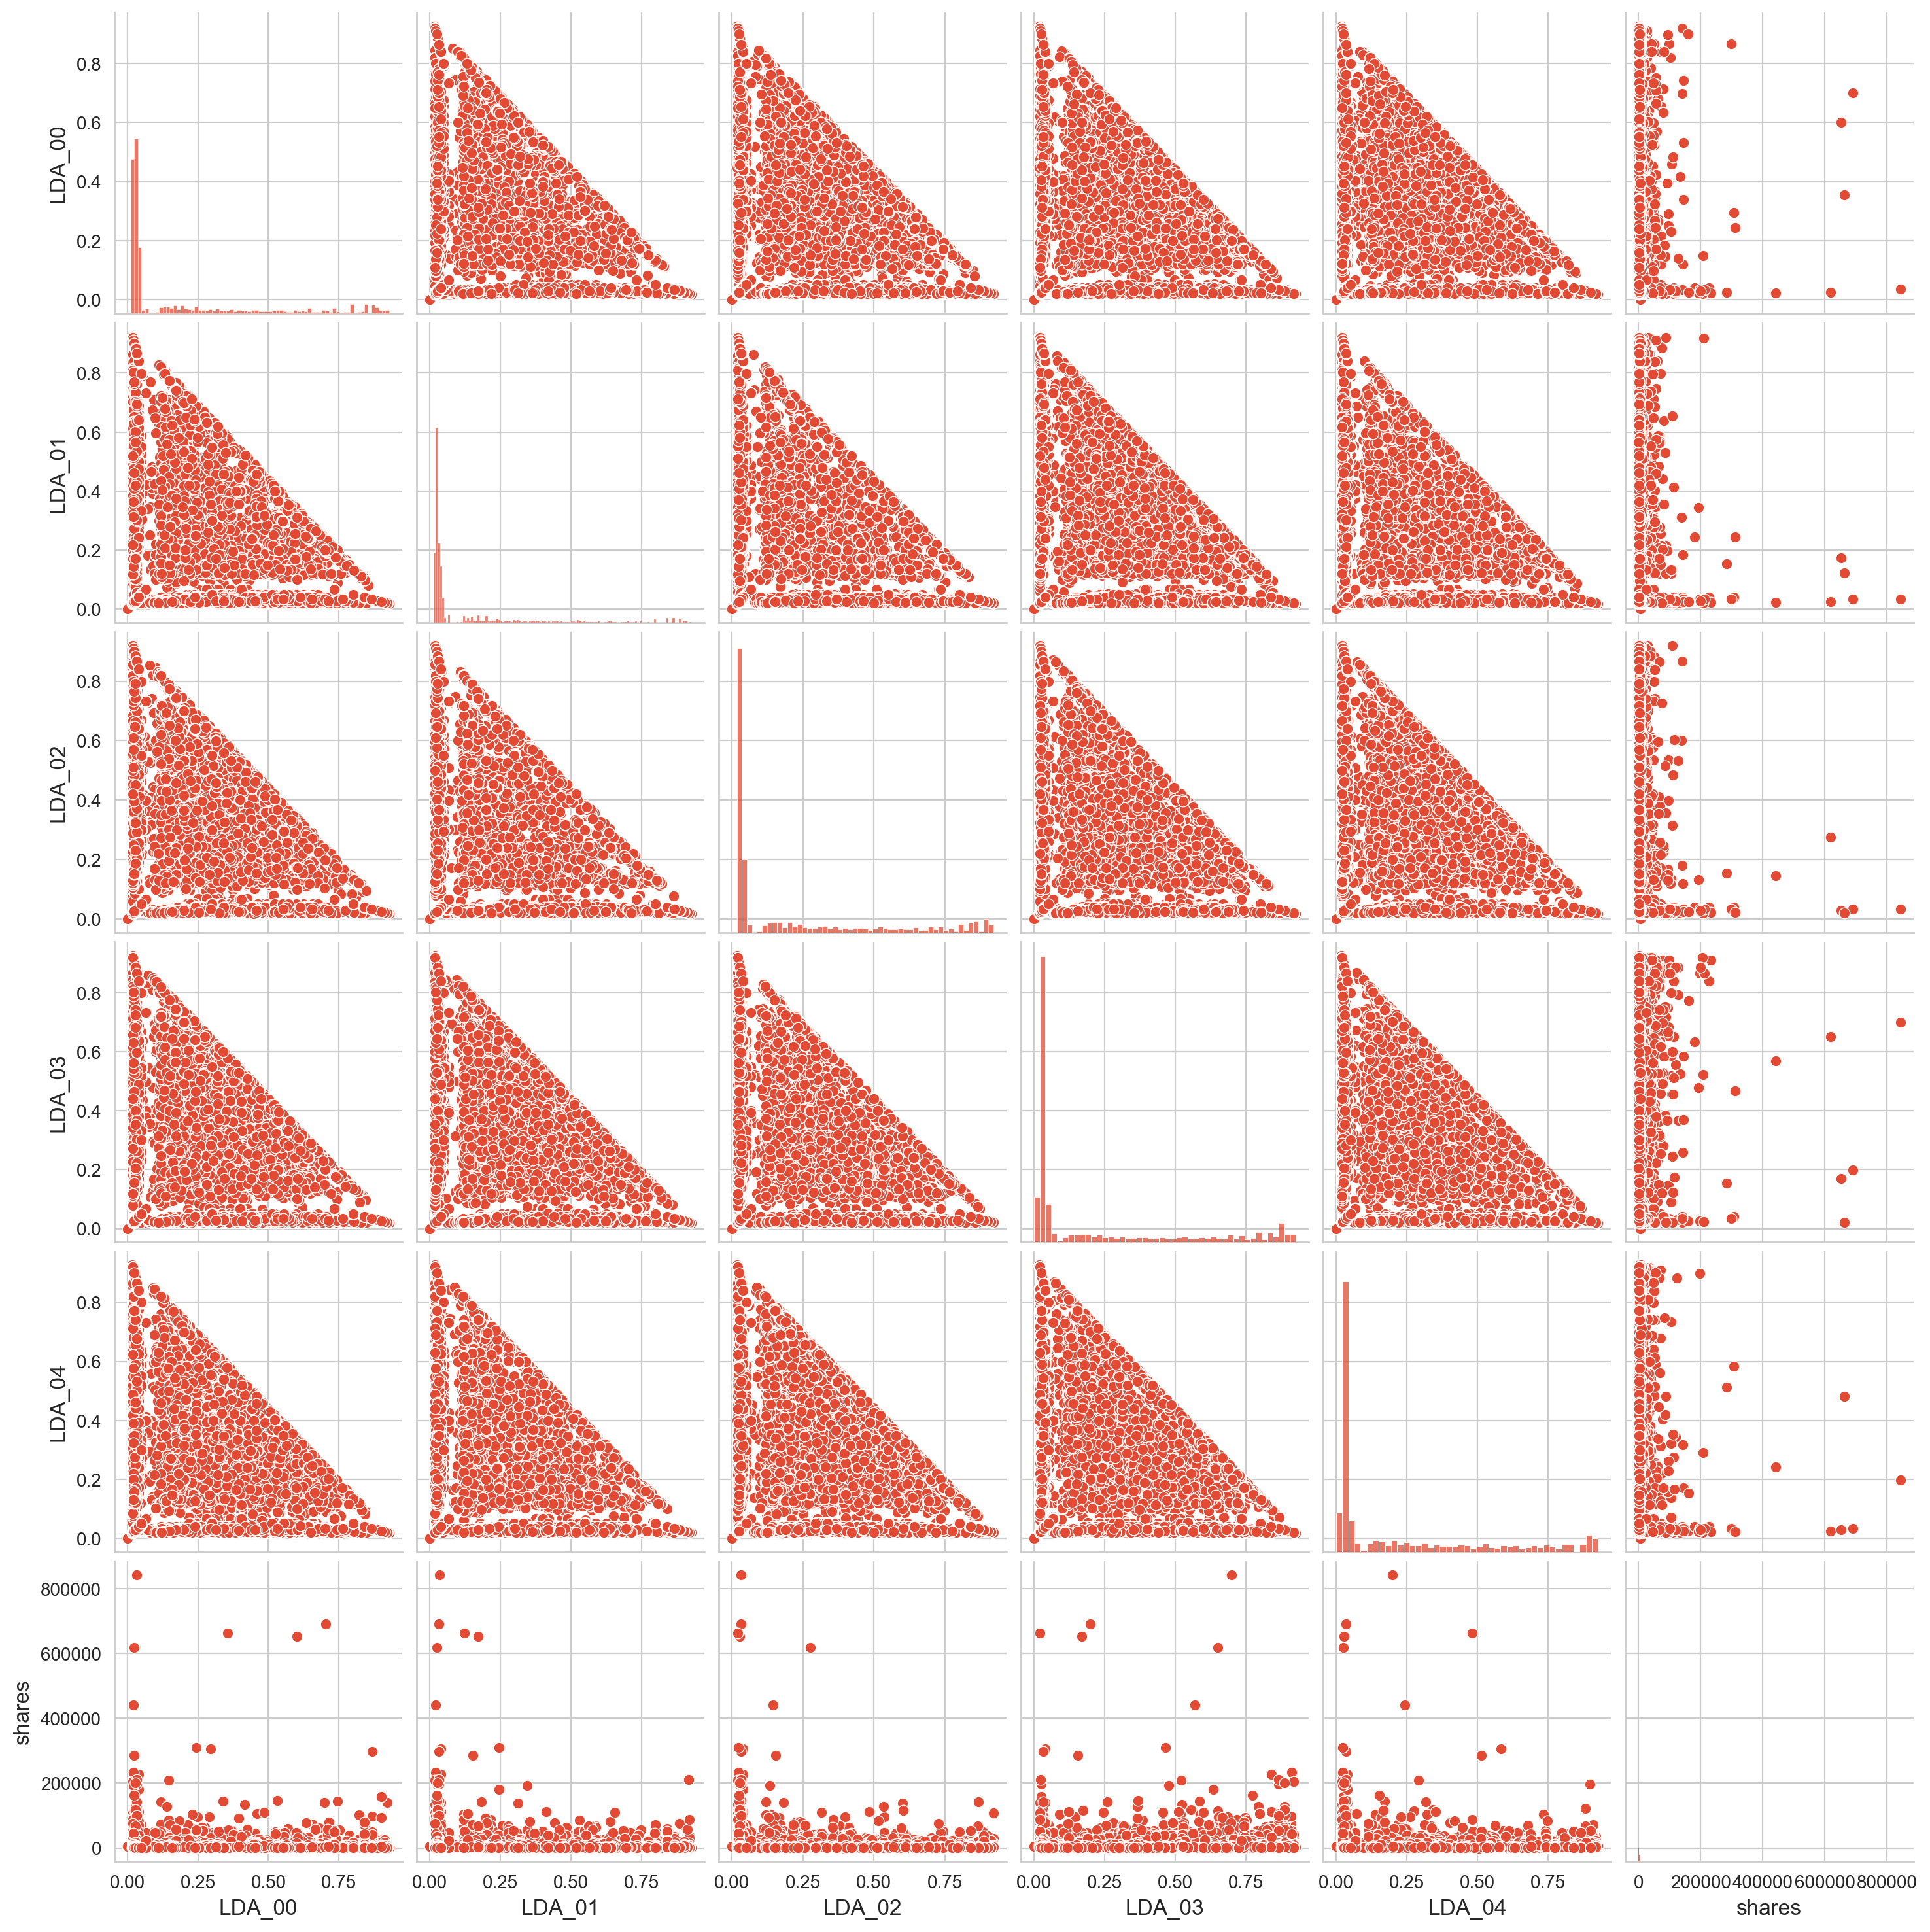

In [69]:
import seaborn as sns

# Select the columns of interest
lda_topics = df[['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'shares']]

# Create pairplot
sns.pairplot(lda_topics)
plt.show()


The Closeness to LDA acoross all the section tends to show the unifom distribution <br>
The uniform distribution implies that the data points are spread evenly across the range of the variable. As a result, it may be easier to predict the likelihood of observing a particular value.<br>
 If the variable follows a uniform distribution, it suggests that there are no underlying trends or patterns influencing the distribution of values. This could be indicative of random or independent processes generating the data.<br> 
therefore we will keep only LDA_02 as the representative in the dataset and drop rest values.

In [70]:
df.drop(labels=['LDA_00', 'LDA_01',  'LDA_03', 'LDA_04' ], axis = 1, inplace=True)
df.head(n=4)    #dropping the feature we dont find relavent

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385          4               2         1           0   
1                  0.791946          3               1         1           0   
2                  0.663866          3               1         1           0   
3                  0.665635          9               0         1           0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365             5                      False   
1              4.913725             4                      False   
2              4.393365             6                      False   
3              4.404896             7                      False   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                           True                False                   False   
1                          False                 True                   False   
2                          False                 True                   False   
3                           True                False                   False   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                 False                  False         0.0         0.0   
1                 False                  False         0.0         0.0   
2                 False                  False         0.0         0.0   
3                 False                  False         0.0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                       496.0               True               False   
1                         0.0               True               False   
2                       918.0               True               False   
3                         0.0               True               False   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                 False                False              False   
1                 False                False              False   
2                 False                False              False   
3                 False                False              False   

   weekday_is_saturday  weekday_is_sunday    LDA_02  global_subjectivity  \
0                False              False  0.040005             0.521617   
1                False              False  0.050096             0.341246   
2                False              False  0.033351             0.702222   
3                False              False  0.494651             0.429850   

   global_sentiment_polarity  global_rate_positive_words  \
0                   0.092562                    0.045662   
1                   0.148948                    0.043137   
2                   0.323333                    0.056872   
3                   0.100705                    0.041

In [71]:
corr_matrix = df.corr()
#print(corr_matrix)
df.corr() 

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.018160   
n_tokens_content                     0.018160          1.000000   
n_unique_tokens                     -0.005318         -0.004737   
n_non_stop_words                    -0.004754          0.017512   
n_non_stop_unique_tokens            -0.005420          0.000373   
num_hrefs                           -0.053496          0.423065   
num_self_hrefs                      -0.014856          0.304682   
num_imgs                            -0.008858          0.342600   
num_videos                           0.051460          0.103699   
average_token_length                -0.071403          0.167789   
num_keywords                        -0.006077          0.072845   
data_channel_is_lifestyle           -0.070815          0.037548   
data_channel_is_entertainment        0.132791          0.060200   
data_channel_is_bus                 -0.023902         -0.006105   
data_channel_is_socmed              -0.090394          0.033424   
data_channel_is_tech                -0.046716          0.025408   
data_channel_is_world                0.049223          0.055989   
kw_min_min                          -0.110672         -0.054345   
kw_max_min                          -0.005890          0.000066   
kw_avg_min                          -0.031400         -0.003545   
kw_min_max                           0.012926         -0.022786   
kw_max_max                           0.120841          0.058860   
kw_avg_max                           0.115746         -0.096460   
kw_min_avg                          -0.002370         -0.022286   
kw_max_avg                           0.006918         -0.030496   
kw_avg_avg                           0.004296         -0.079624   
self_reference_min_shares           -0.004563         -0.030686   
self_reference_max_shares            0.000128          0.025657   
self_reference_avg_sharess           0.000661         -0.013809   
weekday_is_monday                    0.004274         -0.002484   
weekday_is_tuesday                   0.009322         -0.004027   
weekday_is_wednesday                 0.008935         -0.016891   
weekday_is_thursday                 -0.015472         -0.007395   
weekday_is_friday                   -0.002015         -0.015949   
weekday_is_saturday                 -0.015013          0.034538   
weekday_is_sunday                    0.006289          0.036394   
LDA_02                               0.038365          0.087266   
global_subjectivity                 -0.056804          0.127879   
global_sentiment_polarity           -0.072226          0.021937   
global_rate_positive_words          -0.064951          0.133979   
global_rate_negative_words           0.015530          0.125013   
rate_positive_words                 -0.066589          0.098960   
rate_negative_words                  0.034186          0.101053   
avg_positive_polarity               -0.049619          0.135123   
min_positive_polarity               -0.025069         -0.261493   
max_positive_polarity               -0.021662          0.415706   
avg_negative_polarity               -0.017096         -0.130375   
min_negative_polarity               -0.029146         -0.450603   
max_negative_polarity                0.011425          0.225870   
title_subjectivity                   0.077245          0.004484   
title_sentiment_polarity             0.000240          0.023358   
abs_title_subjectivity              -0.146954          0.007136   
abs_title_sentiment_polarity         0.040550          0.013439   
shares                               0.008783          0.002459   

                               n_unique_tokens  n_non_stop_words  \
n_tokens_title                       -0.005318         -0.004754   
n_tokens_content                     -0.004737          0.017512   
n_unique_tokens                       1.000000          0.999572   
n_non_stop_words                      0.999572          1.000000   
n_non

In [72]:


# Define thresholds for high positive and negative word rates
positive_threshold = 0.6  # Example threshold for positive word rate
negative_threshold = 0.6  # Example threshold for negative word rate

# Filter instances with high positive and negative word rates
high_positive = df[df['global_rate_positive_words'] > positive_threshold]
high_negative = df[df['global_rate_negative_words'] > negative_threshold]

# Calculate the average number of shares for each group
avg_shares_high_positive = high_positive['shares'].mean()
avg_shares_high_negative = high_negative['shares'].mean()

# Compare the averages
if avg_shares_high_positive > avg_shares_high_negative:
    print("Instances with high positive word rates tend to have more shares.")
elif avg_shares_high_positive < avg_shares_high_negative:
    print("Instances with high negative word rates tend to have more shares.")
else:
    print("There is no significant difference in shares between instances with high positive and negative word rates.")



There is no significant difference in shares between instances with high positive and negative word rates.


### feature selection

<h5>Feature 1 lasso regression and PCA:</h5>
<ul>
<li> <ul>    
    <li>Choose a feature selection method such as Lasso regression</li>
    <li>Apply the chosen method to select the most important features.</li>
    <li>Filter the original dataset to keep only the selected features.</li></ul>
    <li>Dimensionality Reduction:</li><ul>
    <li>applied dimensionality reduction technique such as Principal Component Analysis (PCA).</li>
    <li> reduce the dimensionality of the dataset while preserving most of its variance.</li>
    <li>Transform the dataset using the PCA transformation.</li> </ul>
    <li> Combine Selected Features and Transformed Data:</li><ul>
<li>Concatenate the selected features obtained from feature reduction with the transformed data obtained from dimensionality reduction.</li>
    <li>This will give a final dataset with reduced features and dimensions.</li></ul></ul>

In [73]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

y=df['shares']
X_train, X_test, y_train ,y_test =train_test_split(df.iloc[:,:-1],y,test_size=0.2)
# Step 1: Feature Reduction
lasso = Lasso(alpha=0.001)  # Example alpha value
lasso.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
selected_features = SelectFromModel(lasso, prefit=True)
X_train_selected = selected_features.transform(X_train)
X_test_selected = selected_features.transform(X_test)

# Step 2: Dimensionality Reduction
pca = PCA(n_components=10)  # Example number of components
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

# Step 3: Combine Selected Features and Transformed Data
X_train_final = pd.DataFrame(X_train_selected, columns=[f"feature_{i}" for i in range(X_train_selected.shape[1])])
X_test_final = pd.DataFrame(X_test_selected, columns=[f"feature_{i}" for i in range(X_test_selected.shape[1])])

# Concatenating X_train_selected and X_train_pca
X_train_final = pd.concat([pd.DataFrame(X_train_selected), pd.DataFrame(X_train_pca)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_selected), pd.DataFrame(X_test_pca)], axis=1)

# Displaying final DataFrame
print("Final DataFrame after feature reduction and dimensionality reduction:")
print(X_train_final.head())
print(X_test_final.head())


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.117e+12, tolerance: 4.330e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Final DataFrame after feature reduction and dimensionality reduction:
     0       1         2    3         4     5     6     7    8         9   \
0   9.0   120.0  0.737288  1.0  0.863014   5.0   2.0   0.0  1.0  4.783333   
1  13.0   758.0  0.476712  1.0  0.662763  12.0   2.0   1.0  1.0  4.701847   
2  13.0   926.0  0.471239  1.0  0.632404  21.0   3.0   1.0  1.0  5.110151   
3  10.0  1712.0  0.428571  1.0  0.658664  35.0  14.0   1.0  0.0  4.557243   
4  11.0  1305.0  0.308871  1.0  0.373702   9.0   7.0  48.0  0.0  4.992337   

     10   11   12   13   14   15   16   17     18          19      20  \
0   6.0  0.0  0.0  0.0  0.0  0.0  1.0  4.0  349.0  104.600000     0.0   
1   5.0  0.0  0.0  0.0  0.0  0.0  1.0 -1.0  513.0  101.800000  2900.0   
2   9.0  0.0  1.0  0.0  0.0  0.0  0.0 -1.0  542.0  137.222222  3500.0   
3  10.0  0.0  0.0  0.0  1.0  0.0  0.0  4.0  716.0  162.000000     0.0   
4   9.0  0.0  0.0  0.0  0.0  0.0  0.0 -1.0  677.0  262.875000     0.0   

         21             22  

<h5>Feature 2:recursive feature elimination</h5>
<ul>    
    <li>Choose a feature selection method such as recursive feature elimination regression</li>
    <li>Apply the chosen method to select the most important features.</li>
    <li>Filter the original dataset to keep only the selected features.</li>
    <li>This will give a final dataset with reduced features and dimensions.</li></ul>

In [74]:

#selection features using recursive feature elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix and y is your target variable
# X should contain only numerical features
X = df.drop(columns=['shares'])  # Assuming 'shares' is the target variable
y = df['shares']

# Define the estimator (e.g., Linear Regression)
estimator = LinearRegression()

# Define the number of features to select
n_features_to_select = 10  # Change this value as desired

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

dataset2=df[selected_features]
dataset2 = pd.concat([dataset2, df['shares']], axis=1)


Selected Features:
Index(['n_unique_tokens', 'n_non_stop_unique_tokens',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_tech', 'LDA_02', 'global_subjectivity',
       'global_rate_positive_words', 'min_positive_polarity',
       'avg_negative_polarity'],
      dtype='object')


In [75]:
dataset2.head()

n_unique_tokens  n_non_stop_unique_tokens  data_channel_is_entertainment  \
0         0.663594                  0.815385                           True   
1         0.604743                  0.791946                          False   
2         0.575130                  0.663866                          False   
3         0.503788                  0.665635                           True   
4         0.415646                  0.540890                          False   

   data_channel_is_bus  data_channel_is_tech    LDA_02  global_subjectivity  \
0                False                 False  0.040005             0.521617   
1                 True                 False  0.050096             0.341246   
2                 True                 False  0.033351             0.702222   
3                False                 False  0.494651             0.429850   
4                False                  True  0.028575             0.513502   

   global_rate_positive_words  min_positive_polarity  avg_negative_polarity  \
0                    0.045662               0.100000              -0.350000   
1                    0.043137               0.033333              -0.118750   
2                    0.056872               0.100000              -0.466667   
3                    0.041431               0.136364              -0.369697   
4                    0.074627               0.033333              -0.220192   

   shares  
0     593  
1     711  
2    1500  
3    1200  
4     505

<h5>Feature 3:GradientBoostingRegressor </h5>
<ul>
<li> <ul>    
    <li>Choose a feature selection method such as recursive feature elimination regression</li>
    <li>Apply the chosen method to select the most important features.</li>
    <li>Filter the original dataset to keep only the selected features.</li></ul>
    <li>This will give a final dataset with reduced features and dimensions.</li></ul>

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X_train is your training data and y_train is your target variable
# Replace X_train and y_train with your actual training data
# Assuming you have already split your data into training and testing sets

# Initialize Gradient Boosting Regressor
gbdt = GradientBoostingRegressor()

# Fit the model to the training data
gbdt.fit(X_train, y_train)

# Get feature importances
feature_importances = gbdt.feature_importances_

# Create a dictionary of feature importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: kw_avg_max, Importance: 0.1543247659203061
Feature: n_tokens_content, Importance: 0.148049992827367
Feature: kw_avg_avg, Importance: 0.11037022815185754
Feature: self_reference_avg_sharess, Importance: 0.06771726609354858
Feature: n_unique_tokens, Importance: 0.0647609960090782
Feature: data_channel_is_bus, Importance: 0.04750614838304862
Feature: weekday_is_saturday, Importance: 0.04036741644981133
Feature: num_self_hrefs, Importance: 0.03934224162943541
Feature: self_reference_min_shares, Importance: 0.03581174059639217
Feature: kw_max_avg, Importance: 0.035036767003871074
Feature: avg_negative_polarity, Importance: 0.034657199553553376
Feature: global_subjectivity, Importance: 0.032581357514232696
Feature: kw_avg_min, Importance: 0.03177809213424067
Feature: num_hrefs, Importance: 0.023626061006163684
Feature: self_reference_max_shares, Importance: 0.021029840377993207
Feature: n_tokens_title, Importance: 0.01627514061630022
Feature: kw_max_min, Importance: 0.01446421461136

based on the top important features we will take top 15 important features

In [77]:
top_feature=[]
i=0
for feature, importance  in sorted_feature_importance:
    if i< 15:
        top_feature.append(feature)
    else:
        break
    i=i+1
    
        
    
    

In [78]:
top_feature

['kw_avg_max',
 'n_tokens_content',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'n_unique_tokens',
 'data_channel_is_bus',
 'weekday_is_saturday',
 'num_self_hrefs',
 'self_reference_min_shares',
 'kw_max_avg',
 'avg_negative_polarity',
 'global_subjectivity',
 'kw_avg_min',
 'num_hrefs',
 'self_reference_max_shares']

In [79]:
dataset3=df[top_feature]
dataset3 = pd.concat([dataset3, df['shares']], axis=1)

#### feature 4 : based on correlation

In [80]:
#selecting features based on correlation

selected_features = corr_matrix['shares'].abs().sort_values(ascending=False).index[1:20]
print(selected_features)
dataset4=df[selected_features]
dataset4 = pd.concat([dataset4, df['shares']], axis=1)


Index(['kw_avg_avg', 'kw_max_avg', 'LDA_02', 'self_reference_avg_sharess',
       'self_reference_min_shares', 'data_channel_is_world',
       'self_reference_max_shares', 'num_hrefs', 'kw_avg_max', 'kw_min_avg',
       'num_imgs', 'avg_negative_polarity', 'global_subjectivity',
       'kw_avg_min', 'kw_max_min', 'abs_title_sentiment_polarity',
       'num_videos', 'average_token_length', 'title_subjectivity'],
      dtype='object')


### Linear regression model function

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn.model_selection import cross_val_score
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    # Step 3: Model Construction
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 4: Model Evaluation
    y_pred = model.predict(X_test)

    cv_scores = cross_val_score(model,X_test ,y_test, cv=10, scoring='r2')

    print("Mean R-squared:", cv_scores.mean())

    


####  Apply linear regression model on the final combined dataset 1

In [82]:

linear_regression_model1 = train_and_evaluate_model(X_train_final, X_test_final, y_train, y_test)

Mean R-squared: -0.9340710555441921


####  Apply linear regression model on the final combined dataset 2

In [83]:
y=dataset2['shares']
X_train2, X_test2, y_train2 ,y_test2 =train_test_split(dataset2.iloc[:,:-1],y,test_size=0.2)
model2 = train_and_evaluate_model(X_train2, X_test2, y_train2, y_test2)


Mean R-squared: 0.01562670406438662


####  Apply linear regression model on the final combined dataset 3

In [84]:
y=dataset3['shares']
X_train3, X_test3, y_train3 ,y_test3 =train_test_split(dataset3.iloc[:,:-1],y,test_size=0.2)
model3 = train_and_evaluate_model(X_train3, X_test3, y_train3, y_test3)

Mean R-squared: -3.0508672831175807


####  Apply linear regression model on the final combined dataset 4

In [85]:
y=dataset4['shares']
X_train4, X_test4, y_train4 ,y_test4 =train_test_split(dataset4.iloc[:,:-1],y,test_size=0.2)
model2 = train_and_evaluate_model(X_train4, X_test4, y_train4, y_test4)

Mean R-squared: 0.030318725179897855


### Conclusion

Based on the mean R-squared values obtained from cross-validation, it seems that the linear regression model's 
performance varies significantly across different folds. Among the provided mean R-squared values, 0.02819045913099989
seems to be the highest, indicating a relatively better fit of the model to the data compared to the others.

In conclusion, the linear regression model's performance is inconsistent, as 
indicated by the varying mean R-squared values. Additionally, given the nature of the data and the results obtained, 
it appears that linear regression may not be the most suitable model for predicting the number of shares in online news 
articles. Other models, such as random forest or classification algorithms, may better capture the nonlinear relationships
and interactions present in the data.

Overall, while linear regression provides insights into the relationship between predictors and the response variable,
other modeling techniques may offer better predictive accuracy for this particular dataset.